In [3]:
import keras

In [4]:
print(keras.__version__)

2.0.8


# Classifying newswires: a multi-class classification example

## The Reuters dataset

We will be working with the _Reuters_ dataset, a set of short newswires and their topics, published by Reuters in 1986. It's a very simple, widely used toy dataset for text classification. There are 46 different topics; some topics are more represented than others, but each topic has at least 10 examples in the training set.

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2039808/2110848 [===========================>..] - ETA: 0s

In [5]:
len(train_data), len(test_data)

(8982, 2246)

In [6]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [7]:
train_labels[10]

3

In [8]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# offset indices by 3
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

524288/550378 [===========================>..] - ETA: 0s

In [9]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

## Preparing the data

In [10]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [13]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## Building our network

In [14]:
from keras import models
from keras import layers

In [15]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [16]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Validating our approach

In [17]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [19]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s - loss: 2.5198 - acc: 0.4974 - val_loss: 1.7107 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 0s - loss: 1.4340 - acc: 0.6904 - val_loss: 1.3404 - val_acc: 0.7130
Epoch 3/20
7982/7982 [==============================] - 0s - loss: 1.0868 - acc: 0.7687 - val_loss: 1.1668 - val_acc: 0.7460
Epoch 4/20
7982/7982 [==============================] - 0s - loss: 0.8605 - acc: 0.8201 - val_loss: 1.0731 - val_acc: 0.7610
Epoch 5/20
7982/7982 [==============================] - 0s - loss: 0.6915 - acc: 0.8525 - val_loss: 0.9778 - val_acc: 0.7840
Epoch 6/20
7982/7982 [==============================] - 0s - loss: 0.5553 - acc: 0.8827 - val_loss: 0.9340 - val_acc: 0.8080
Epoch 7/20
7982/7982 [==============================] - 0s - loss: 0.4495 - acc: 0.9059 - val_loss: 0.9057 - val_acc: 0.8050
Epoch 8/20
7982/7982 [==============================] - 0s - loss: 0.3626 - a

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline


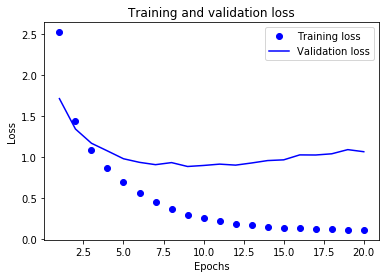

In [22]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

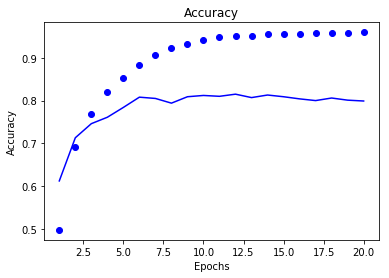

In [24]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

It seems that the network starts overfitting after 8 epochs. Let's train a new network from scratch for 8 epochs, then let's evaluate it on the test set:

In [30]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10000,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax'),   
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 0s - loss: 2.6130 - acc: 0.5232 - val_loss: 1.7188 - val_acc: 0.6540
Epoch 2/8
7982/7982 [==============================] - 0s - loss: 1.4216 - acc: 0.7058 - val_loss: 1.3109 - val_acc: 0.7050
Epoch 3/8
7982/7982 [==============================] - 0s - loss: 1.0584 - acc: 0.7741 - val_loss: 1.1037 - val_acc: 0.7660
Epoch 4/8
7982/7982 [==============================] - 0s - loss: 0.8369 - acc: 0.8250 - val_loss: 1.0025 - val_acc: 0.7850
Epoch 5/8
7982/7982 [==============================] - 0s - loss: 0.6719 - acc: 0.8597 - val_loss: 0.9371 - val_acc: 0.8100
Epoch 6/8
7982/7982 [==============================] - 0s - loss: 0.5345 - acc: 0.8901 - val_loss: 0.9142 - val_acc: 0.8080
Epoch 7/8
7982/7982 [==============================] - 0s - loss: 0.4288 - acc: 0.9105 - val_loss: 0.8588 - val_acc: 0.8260
Epoch 8/8
7982/7982 [==============================] - 0s - loss: 0.3469 - acc: 0.92

In [33]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s     


In [34]:
results

[0.97066030264537673, 0.78584149604595244]

Our approach reaches an accuracy of ~78%. With a balanced binary classification problem, the accuracy reached by a purely random classifier would be 50%, but in our case it is closer to 19%, so our results seem pretty good, at least when compared to a random baseline:

In [35]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.18432769367764915

## Generating predictions on new data

In [36]:
predictions = model.predict(x_test)

In [37]:
predictions[0].shape

(46,)

the coefficients in the vector sum to 1:

In [38]:
np.sum(predictions[0])

1.0

In [41]:
np.argmax(predictions[0], axis=0) # or np.argmax(predictions[0])

3

## A different way to handle the labels and the loss

In [42]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [44]:
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

The only thing it would change is the choice of the loss function. Our previous loss, `categorical_crossentropy`, expects the labels to follow a categorical encoding. With integer labels, we should use `sparse_categorical_crossentropy`

In [43]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 0s - loss: 0.3196 - acc: 0.9297 - val_loss: 0.8701 - val_acc: 0.8240
Epoch 2/8
7982/7982 [==============================] - 0s - loss: 0.2318 - acc: 0.9444 - val_loss: 0.8637 - val_acc: 0.8200
Epoch 3/8
7982/7982 [==============================] - 0s - loss: 0.2053 - acc: 0.9488 - val_loss: 0.9032 - val_acc: 0.8170
Epoch 4/8
7982/7982 [==============================] - 0s - loss: 0.1799 - acc: 0.9519 - val_loss: 0.8822 - val_acc: 0.8270
Epoch 5/8
7982/7982 [==============================] - 0s - loss: 0.1624 - acc: 0.9541 - val_loss: 0.9206 - val_acc: 0.8210
Epoch 6/8
7982/7982 [==============================] - 0s - loss: 0.1468 - acc: 0.9562 - val_loss: 0.9574 - val_acc: 0.8220
Epoch 7/8
7982/7982 [==============================] - 0s - loss: 0.1391 - acc: 0.9557 - val_loss: 1.0139 - val_acc: 0.8050
Epoch 8/8
7982/7982 [==============================] - 0s - loss: 0.1320 - acc: 0.95

## On the importance of having sufficiently large intermediate layers

We mentioned earlier that since our final outputs were 46-dimensional, we should avoid intermediate layers with much less than 46 hidden units. Now let's try to see what happens when we introduce an information bottleneck by having intermediate layers significantly less than 46-dimensional, e.g. 4-dimensional.

In [46]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10000,)),
    layers.Dense(4, activation='relu'),
    layers.Dense(46, activation='softmax'),
])
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 0s - loss: 3.4389 - acc: 0.2464 - val_loss: 3.0898 - val_acc: 0.2970
Epoch 2/8
7982/7982 [==============================] - 0s - loss: 2.8299 - acc: 0.3140 - val_loss: 2.6761 - val_acc: 0.3120
Epoch 3/8
7982/7982 [==============================] - 0s - loss: 2.4193 - acc: 0.3334 - val_loss: 2.3567 - val_acc: 0.3300
Epoch 4/8
7982/7982 [==============================] - 0s - loss: 2.0579 - acc: 0.3614 - val_loss: 2.0447 - val_acc: 0.4930
Epoch 5/8
7982/7982 [==============================] - 0s - loss: 1.7003 - acc: 0.6731 - val_loss: 1.7460 - val_acc: 0.6840
Epoch 6/8
7982/7982 [==============================] - 0s - loss: 1.4076 - acc: 0.7162 - val_loss: 1.5547 - val_acc: 0.6890
Epoch 7/8
7982/7982 [==============================] - 0s - loss: 1.2226 - acc: 0.7278 - val_loss: 1.4591 - val_acc: 0.6930
Epoch 8/8
7982/7982 [==============================] - 0s - loss: 1.1097 - acc: 0.73

Our network now seems to peak at ~71% test accuracy, a 8% absolute drop. This drop is mostly due to the fact that we are now trying to compress a lot of information (enough information to recover the separation hyperplanes of 46 classes) into an intermediate space that is too low-dimensional. The network is able to cram most of the necessary information into these 8-dimensional representations, but not all of it.